In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("dataUSmines.xlsx",header=0) # importing dataset

In [3]:
df.head()

,Year,MSHA ID,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
0,2020,103489,John Poe Mine,Alabama,De Kalb,Active,Surface,Independent Producer Operator,Mine only,Kennedy Brothers Construction,"756 Co. Rd 676, Fort Payne, AL 35968",NaN,Appalachia Southern,17865,2,1440
1,2020,100329,Oak Grove Preparation Plant,Alabama,Jefferson,Active,Underground,Independent Producer Operator,Preparation Plant,Crimson Oak Grove Resources Ll,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,47,102797
2,2020,100627,Flat Top Mine,Alabama,Jefferson,Active,Surface,Independent Producer Operator,Mine only,Best Coal Inc.,"P.O. Box 1608, Jasper, AL 35502",NaN,Appalachia Southern,239590,42,107899
3,2020,100851,Oak Grove Mine,Alabama,Jefferson,Active,Underground,Independent Producer Operator,Mine only,Crimson Oak Grove Resources Ll,"8360 Taylors Ferry Rd, Bessemer, AL 35023",United Mine Workers Of America,Appalachia Southern,1608068,397,913988
4,2020,101401,No 7 Mine,Alabama,Jefferson,Active,Underground,Independent Producer Operator,Mine and Preparation Plant,"Warrior Met Coal Mining, Llc","P.O. Box 133, Brookwood, AL 35444",United Mine Workers Of America,Appalachia Southern,5708153,844,2149456


In [4]:
df.shape

(772, 16)

In [5]:
df.describe()

,Year,MSHA ID,Production (short tons),Average Employees,Labor Hours
count,772.0,7.720000e+02,7.720000e+02,772.000000,7.720000e+02
mean,2020.0,3.225257e+06,6.935678e+05,54.610104,1.132691e+05
std,0.0,1.427655e+06,3.428691e+06,114.740838,2.438533e+05
min,2020.0,1.003290e+05,0.000000e+00,0.000000,2.800000e+01
25%,2020.0,1.519809e+06,0.000000e+00,6.000000,8.269000e+03
50%,2020.0,3.609315e+06,2.103500e+04,15.000000,2.739600e+04
75%,2020.0,4.605172e+06,1.925898e+05,41.250000,9.108600e+04
max,2020.0,5.000030e+06,6.611184e+07,1078.000000,2.149456e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       772 non-null    int64 
 1   MSHA ID                    772 non-null    int64 
 2   Mine Name                  772 non-null    object
 3   Mine State                 772 non-null    object
 4   Mine County                772 non-null    object
 5   Mine Status                772 non-null    object
 6   Mine Type                  772 non-null    object
 7   Company Type               772 non-null    object
 8   Operation Type             772 non-null    object
 9   Operating Company          772 non-null    object
 10  Operating Company Address  772 non-null    object
 11  Union Code                 58 non-null     object
 12  Coal Supply Region         772 non-null    object
 13  Production (short tons)    772 non-null    int64 
 14  Average Em

In [7]:
#removing unwanted columns
del df['Year']
del df['MSHA ID']
del df['Mine Name']
del df['Operating Company Address']
del df['Union Code']
del df['Mine State']
del df['Mine County']
del df['Operating Company']

In [8]:
df.head()

,Mine Status,Mine Type,Company Type,Operation Type,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
0,Active,Surface,Independent Producer Operator,Mine only,Appalachia Southern,17865,2,1440
1,Active,Underground,Independent Producer Operator,Preparation Plant,Appalachia Southern,0,47,102797
2,Active,Surface,Independent Producer Operator,Mine only,Appalachia Southern,239590,42,107899
3,Active,Underground,Independent Producer Operator,Mine only,Appalachia Southern,1608068,397,913988
4,Active,Underground,Independent Producer Operator,Mine and Preparation Plant,Appalachia Southern,5708153,844,2149456


In [9]:
df=df[df["Production (short tons)"]!=0]

In [10]:
df.describe()

,Production (short tons),Average Employees,Labor Hours
count,5.520000e+02,552.000000,5.520000e+02
mean,9.699898e+05,70.579710,1.467165e+05
std,4.022580e+06,132.002519,2.807865e+05
min,1.150000e+02,1.000000,2.800000e+01
25%,1.443325e+04,7.000000,1.009300e+04
50%,8.329150e+04,19.500000,3.660400e+04
75%,3.606902e+05,65.000000,1.408352e+05
max,6.611184e+07,1078.000000,2.149456e+06


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 0 to 771
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Mine Status              552 non-null    object
 1   Mine Type                552 non-null    object
 2   Company Type             552 non-null    object
 3   Operation Type           552 non-null    object
 4   Coal Supply Region       552 non-null    object
 5   Production (short tons)  552 non-null    int64 
 6   Average Employees        552 non-null    int64 
 7   Labor Hours              552 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 38.8+ KB


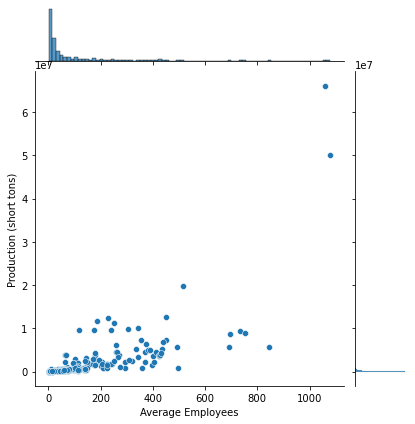

In [12]:
sns.jointplot(x="Average Employees",y="Production (short tons)",data=df)

In [13]:
df["Average Employees"].skew()

3.700845861006474

In [14]:
# df['AV_log']=np.log(df["Average Employees"])
# df['AV_log'].skew()

In [15]:
# sns.jointplot(x="AV_log",y="Production (short tons)",data=df)

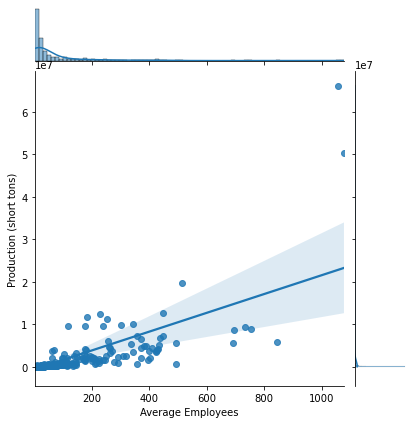

In [16]:
sns.jointplot(x=df['Average Employees'], y=df['Production (short tons)'],data=df,kind= 'reg')

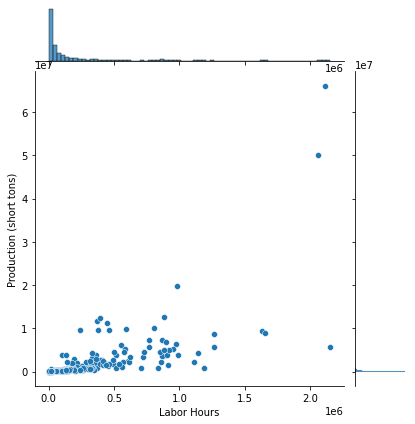

In [17]:
sns.jointplot(x="Labor Hours",y="Production (short tons)",data=df)

<AxesSubplot:xlabel='Mine Status', ylabel='count'>

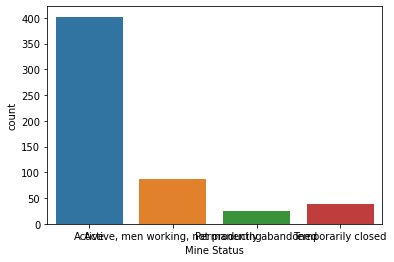

In [18]:
sns.countplot(x='Mine Status',data=df)

<AxesSubplot:xlabel='Mine Type', ylabel='count'>

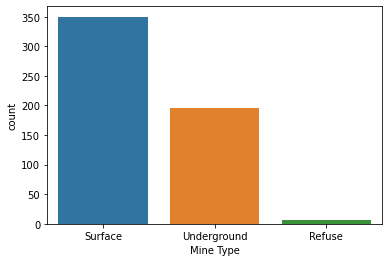

In [19]:
sns.countplot(x='Mine Type',data=df)

<AxesSubplot:xlabel='Company Type', ylabel='count'>

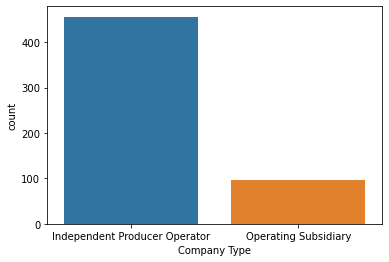

In [20]:
sns.countplot(x='Company Type',data=df)

<AxesSubplot:xlabel='Operation Type', ylabel='count'>

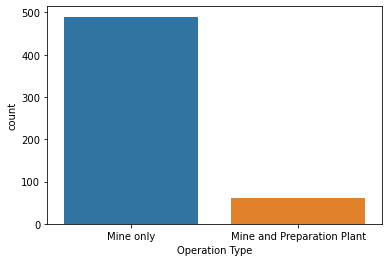

In [21]:
sns.countplot(x='Operation Type',data=df)

<AxesSubplot:xlabel='Coal Supply Region', ylabel='count'>

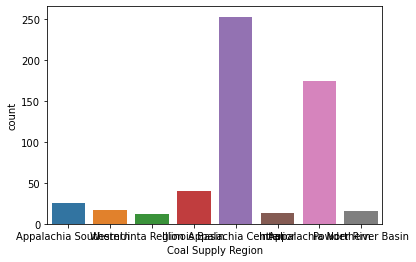

In [22]:
sns.countplot(x='Coal Supply Region',data=df)

In [23]:
df = pd.get_dummies(df,columns=["Mine Status","Mine Type","Company Type","Operation Type","Coal Supply Region"],drop_first=True)

In [24]:
df.corr()

,Production (short tons),Average Employees,Labor Hours,"Mine Status_Active, men working, not producing",Mine Status_Permanently abandoned,Mine Status_Temporarily closed,Mine Type_Surface,Mine Type_Underground,Company Type_Operating Subsidiary,Operation Type_Mine only,Coal Supply Region_Appalachia Northern,Coal Supply Region_Appalachia Southern,Coal Supply Region_Illinois Basin,Coal Supply Region_Interior,Coal Supply Region_Powder River Basin,Coal Supply Region_Uinta Region,Coal Supply Region_Western
Production (short tons),1.000000,0.725804,0.684460,-0.088447,-0.049230,-0.063938,-0.000045,0.005098,0.195131,-0.353921,-0.088651,-0.027805,0.050116,0.031199,0.576575,0.032202,0.097183
Average Employees,0.725804,1.000000,0.989897,-0.119836,-0.089345,-0.123489,-0.259472,0.272135,0.368143,-0.464700,-0.109032,0.038898,0.139180,0.068704,0.311033,0.135361,0.167535
Labor Hours,0.684460,0.989897,1.000000,-0.116900,-0.093905,-0.125055,-0.273507,0.286471,0.349042,-0.457307,-0.107450,0.066039,0.148881,0.055498,0.274496,0.132173,0.151605
"Mine Status_Active, men working, not producing",-0.088447,-0.119836,-0.116900,1.000000,-0.093567,-0.118449,-0.005486,0.015280,0.013752,0.026252,-0.163866,0.045961,0.072603,0.032105,-0.074222,-0.029786,-0.076578
Mine Status_Permanently abandoned,-0.049230,-0.089345,-0.093905,-0.093567,1.000000,-0.060053,0.002687,-0.015963,-0.053965,0.077475,-0.017332,-0.007301,0.039936,-0.033825,-0.037631,-0.032468,-0.038825
Mine Status_Temporarily closed,-0.063938,-0.123489,-0.125055,-0.118449,-0.060053,1.000000,0.092051,-0.086395,-0.089206,0.075688,0.024855,-0.061301,0.004743,-0.042820,-0.047638,-0.041102,-0.049150
Mine Type_Surface,-0.000045,-0.259472,-0.273507,-0.005486,0.002687,0.092051,1.000000,-0.976700,-0.177307,0.027533,0.089228,0.062390,-0.077789,0.117983,0.131256,-0.118856,0.048348
Mine Type_Underground,0.005098,0.272135,0.286471,0.015280,-0.015963,-0.086395,-0.976700,1.000000,0.188899,-0.035794,-0.090613,-0.057751,0.070049,-0.115234,-0.128198,0.123026,-0.044618
Company Type_Operating Subsidiary,0.195131,0.368143,0.349042,0.013752,-0.053965,-0.089206,-0.177307,0.188899,1.000000,-0.154656,-0.250980,-0.102011,0.019237,0.149367,0.120150,0.029924,0.222517
Operation Type_Mine only,-0.353921,-0.464700,-0.457307,0.026252,0.077475,0.075688,0.027533,-0.035794,-0.154656,1.000000,0.032745,-0.029240,-0.232525,0.055243,-0.348920,-0.143684,-0.169048


As we can see that 'Average Employees' and 'Labor Hours' are highly correlated with a correlation coefficient of 0.990320. This can lead to multiculinearity so we will delete one them,as 'Labor Hours' has a low correlation coefficient value with price when compared with 'Average Employees' so we will delete 'Labor Hours' column from our data

In [25]:
del df['Labor Hours']

In [26]:
# these have very low correlation coefficient with production 
del df['Mine Type_Surface']
del df['Mine Type_Underground']

### X - y split

In [27]:
X=df.loc[:,df.columns!="Production (short tons)"]

In [28]:
y=df["Production (short tons)"]

### Train - test split

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Multiple linear regression 

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lm_a=LinearRegression()

In [32]:
lm_a.fit(X_train,y_train)

LinearRegression()

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
r2_score(y_test,lm_a.predict(X_test))

0.5680592217388427

### Ridge and lasso regression 

In [35]:
from sklearn import preprocessing
scaler =preprocessing.StandardScaler().fit(X_train)
X_train_s= scaler.transform(X_train)
X_test_s =scaler.transform(X_test)
from sklearn.linear_model import Ridge
lm_r =Ridge(alpha=0.5)
lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.5)

In [36]:
r2_score(y_test,lm_r.predict(X_test_s))

0.5676526779726814

In [37]:
from sklearn.linear_model import Lasso
lm_l=Lasso(alpha =0.4)
lm_l.fit(X_train_s,y_train)

Lasso(alpha=0.4)

In [38]:
r2_score(y_test,lm_l.predict(X_test_s))

0.5680591386529836

### Decision tree 

In [39]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [40]:
regtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [41]:
r2_score(y_train,regtree.predict(X_train))

0.8883177368237396

In [42]:
r2_score(y_test,regtree.predict(X_test))

0.9070704931218894

In [43]:
from sklearn import tree
regtree2 = tree.DecisionTreeRegressor(max_depth = 6)

regtree2.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error, r2_score

r2_score(y_test,regtree2.predict(X_test))

0.9117980570545764

### XG boost 

In [44]:
import xgboost as xgb

xgb_reg=xgb.XGBRegressor(max_depth=5,n_estimators=10000,learning_rate=0.3,n_jobs=-1)

xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [45]:
r2_score(y_test,xgb_reg.predict(X_test))

0.9178816196027739

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

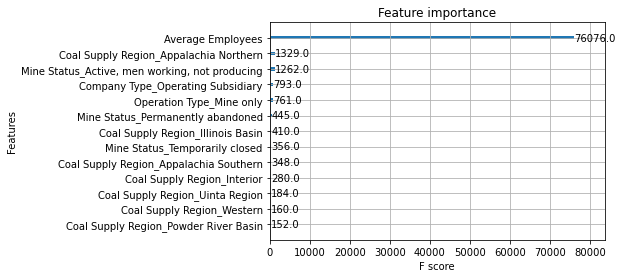

In [46]:
xgb.plot_importance(xgb_reg)

### Random forest 

In [47]:
from sklearn.ensemble import RandomForestRegressor 

rf_reg= RandomForestRegressor(n_estimators=1000,n_jobs=-1, random_state=42)

rf_reg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [48]:
r2_score(y_test, rf_reg.predict(X_test))

0.7938326173570791

### Grid Search

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
rf_reg2 = RandomForestRegressor(n_estimators=1000, random_state=42)

In [51]:
params_grid ={"max_features":[10,11,12],"min_samples_split":[3,4]}

In [52]:
grid_search=GridSearchCV(rf_reg2,params_grid,n_jobs=-1, cv=5,scoring='r2')

In [53]:
GridSearchCV?

In [54]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=1000,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [10, 11, 12],
                         'min_samples_split': [3, 4]},
             scoring='r2')

In [55]:
grid_search.best_params_

{'max_features': 11, 'min_samples_split': 3}

In [56]:
cvrf_clf=grid_search.best_estimator_

In [57]:
r2_score(y_test, cvrf_clf.predict(X_test))

0.7837303433921378

Max r2 score = 0.9178816196027739 from xg boost